# Car make and model Recognition with Caffe using GoogLeNet 

It is assumed that this notebook is in /deeplearning/notebooks/.

Imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import caffe
import os

Set up paths, scripts and models, mean pixel and labels file names.

In [10]:
# Make sure that caffe is on the python path:
caffe_root = '/opt/caffe/'  
models_path = '/deeplearning/Models/'
data_path = '/deeplearning/Datasets/'
sys.path.insert(0, caffe_root + 'python')
# model location
model_path  = 'GoogLeNet_cars/'
model_conf_name  = 'deploy_googlenet.prototxt'
model_name = 'googlenet_finetune_web_car_iter_10000.caffemodel'
model_configuration = models_path + model_path + model_conf_name
model = models_path + model_path + model_name
print model
# download script
#download_script = '../scripts/download_model_binary.py'
# mean pixel file
mean_pixel_file  = caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy'
# ImageNet labels filename
#imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
# get labels script
#get_labels = '!/opt/caffe/data/ilsvrc12/get_ilsvrc_aux.sh'

/deeplearning/Models/GoogLeNet_cars/googlenet_finetune_web_car_iter_10000.caffemodel


Download the pretrained CaffeNet model if not already available in the Caffe installation  (@<caffe_root>/models/bvlc_reference_caffenet). 

In [11]:
if not os.path.isfile(model):
    print("Downloading pre-trained CaffeNet model...")
    ! download_script model_path
else:
    print("The pre-trained CaffeNet model is already available!")

The pre-trained CaffeNet model is already available!


Set Caffe to CPU mode, load the net in the test phase for inference. 

In [ ]:
mode = caffe.TEST
caffe.set_mode_cpu()
net = caffe.Net(model_configuration, model, mode)

Configure the input preprocessing.

In [49]:
batch_size =50
channels  = 3
gray_range = 255
image_size = 224
input_images_path = 'DemoImages/'
input_fname = 'chrysler-delta-1_256.jpg'
#input_image_file = caffe_root + input_images_path + input_fname
input_image_file = data_path + input_images_path + input_fname

In [50]:
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(mean_pixel_file).mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', gray_range)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

Alghtough only one image will be classified, set up 50 to demonstrate batch processing.

In [51]:
net.blobs['data'].reshape(batch_size,channels,image_size,image_size)

Load the input image

In [52]:
if os.path.isfile(input_image_file):
    print("Loading input image ...")
    net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(input_image_file))
else:
    print("The specified input image cannot be found!")

Loading input image ...


What did the input look like?

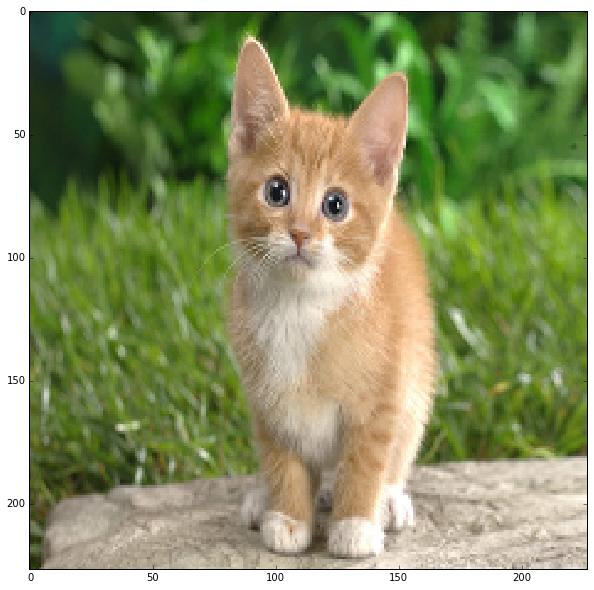

In [53]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(transformer.deprocess('data', net.blobs['data'].data[0]))

Feed in the image (with some preprocessing) and classify with a forward pass.

In [54]:
print("Starting forward pass")
out = net.forward()
print("Predicted class is #{}.".format(out['prob'].argmax()))

Starting forward pass
Predicted class is #48281.


Was our classification correct?

In [55]:
# load labels
try:
    labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')
except:
  #  get_labels
    !/opt/caffe/data/ilsvrc12/get_ilsvrc_aux.sh
    labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')

# sort top k predictions from softmax output
top_k = net.blobs['prob'].data[0].flatten().argsort()[-1:-6:-1]
flattened = net.blobs['prob'].data[0].flatten()
flattened.sort()
print flattened[-1:-6:-1]
print labels[top_k]

[ 0.31243584  0.2379715   0.12387265  0.10075713  0.0709573 ]
['n02123045 tabby, tabby cat' 'n02123159 tiger cat'
 'n02124075 Egyptian cat' 'n02119022 red fox, Vulpes vulpes'
 'n02127052 lynx, catamount']
